In [2]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

In [2]:
ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/MICHIGAN samples.zip').open(name='result.csv'))


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,18,19,20,22,23,24,25,30,32,33,35,36,37,39,40,41,42,43,44,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
stations = pd.read_csv(ZipFile('../../measurements/USGS stream data/MICHIGAN stations.zip').open(name='station.csv'))

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,14,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
river='Belle_R'

In [5]:
location = (42.847096, -82.714587)

In [6]:
delta_xy = 0.5
r_stations = stations[(stations.LatitudeMeasure>location[0]-delta_xy) & (stations.LatitudeMeasure<location[0]+delta_xy) &
                     (stations.LongitudeMeasure>location[1]-delta_xy) & (stations.LongitudeMeasure<location[1]+delta_xy)]

In [7]:
csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(r_stations.MonitoringLocationIdentifier.unique())]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
# csv_file_df['']
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
df = csv_file_df
df = csv_file_df[(csv_file_df['CharacteristicName']=="Chloride") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
df.shape              

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1587, 63)

In [8]:
Show_IDS = [[st, False] for st in df.MonitoringLocationIdentifier.unique()] 

In [9]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=900,height=600, 
                location=location,
               control_scale = True,
                 zoom_start=12.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all
# for index, st_dic in enumerate(Show_IDS):
#     st = st_dic[0]
#     N = df[df.MonitoringLocationIdentifier==st].shape[0]
#     if N>0:
#         st_df = stations[stations.MonitoringLocationIdentifier == st]
#         folium.Marker(location=[st_df.LatitudeMeasure.values[0], 
#                                 st_df.LongitudeMeasure.values[0]], 
#                                   popup=folium.Popup(html=st_df.MonitoringLocationIdentifier.values[0] + '\n' + 'N:{}'.format(N),
#                                 show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                      ).add_to(m)



Show_IDS = [
["21MICH_WQX-740415", True],
["21MICH-740377", True],
["21MICH_WQX-740451", True],
["USGS-04160600", True],
["21MICH-740388", True],
]

ignore_indx = [3]

for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = stations[stations.MonitoringLocationIdentifier == st]
    folium.CircleMarker(location=[st_df.LatitudeMeasure.values[0], 
                            st_df.LongitudeMeasure.values[0]], radius=23, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index in [i-1 for i in ignore_indx]:
        folium.map.Marker(
#         location=[st_df.LatitudeMeasure.values[0]+0.0235,st_df.LongitudeMeasure.values[0]-0.1026], # 10 km
        location=[st_df.LatitudeMeasure.values[0]+0.0135,st_df.LongitudeMeasure.values[0]-0.0526], # 5km
#         location=[st_df.LatitudeMeasure.values[0]+0.0065,st_df.LongitudeMeasure.values[0]-0.026], # 2km
#         location=[st_df.LatitudeMeasure.values[0]+0.0031,st_df.LongitudeMeasure.values[0]-0.013], # 1km
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
            )
        ).add_to(m)


m






21MICH_WQX-740415
21MICH-740377
21MICH_WQX-740451
USGS-04160600
21MICH-740388


In [10]:
selected_stations = [s[0] for s in Show_IDS]
# selected_stations = [
# "21OHIO_WQX-200572",
# "21OHIO_WQX-502520",
# "21OHIO_WQX-G02S14",
# "USGS-04212100",
# "USGS-04211820",
# "21OHIO_WQX-G02K52",
# "21OHIO_WQX-G02K54",
# "21OHIO_WQX-300187",
# "21OHIO_WQX-G01K08",
# "21OHIO_WQX-G01K07"]

In [11]:
WQP_name = "Chloride"


csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(selected_stations)]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995) & (csv_file_df['ActivityStartDate'].dt.year<2019)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(24, 63)

In [12]:
# df_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/TP_Maumee_River_Data.csv')

# df_heideleberg['Date'] =pd.to_datetime(df_heideleberg['Date'], errors='coerce')
# df_heideleberg['MonitoringLocationIdentifier'] = 'HTLP (NCWQR)'
# df_heideleberg['ActivityStartDate']=df_heideleberg['Date']
# df_heideleberg['ResultMeasureValue']=df_heideleberg['TP, mg/L as P']
# sp= sp.append(df_heideleberg)
# sp=sp.sort_values('MonitoringLocationIdentifier', ascending=False)
# sp['Station']=sp['MonitoringLocationIdentifier']
# sp.shape


In [13]:
pt = sns.color_palette("colorblind", len(selected_stations))

In [14]:
len(selected_stations)

5

In [15]:
sp['ResultMeasure/MeasureUnitCode'].unique()

array(['mg/l      ', 'mg/l'], dtype=object)

In [16]:
# sp.loc[sp["ResultMeasureValue"]>100, "ResultMeasureValue"] = np.nan

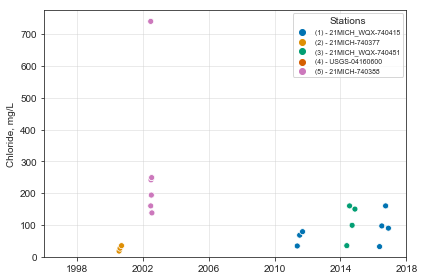

In [17]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
colors = ["windows blue", "greyish", "faded green", "dusty purple", "amber"]
ax = sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=sp, hue_order=selected_stations, hue='MonitoringLocationIdentifier', palette=pt, markers=True)
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('Rivers/'+river+'/'+river+'_Cl.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl_meas.pdf')



In [30]:
print(sp.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().reindex(selected_stations).round(2).to_latex())


\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &    mean &     std &    min &    25\% &    50\% &     75\% &    max \\
MonitoringLocationIdentifier &        &         &         &        &        &        &         &        \\
\midrule
21MICH\_WQX-740415            &    7.0 &   80.00 &   43.50 &   32.0 &   51.0 &   79.0 &   93.50 &  160.0 \\
21MICH-740377                &    3.0 &   26.67 &    8.50 &   18.0 &   22.5 &   27.0 &   31.00 &   35.0 \\
21MICH\_WQX-740451            &    4.0 &  111.00 &   57.28 &   35.0 &   83.0 &  124.5 &  152.50 &  160.0 \\
USGS-04160600                &    NaN &     NaN &     NaN &    NaN &    NaN &    NaN &     NaN &    NaN \\
21MICH-740388                &   10.0 &  254.60 &  176.22 &  138.0 &  168.5 &  218.0 &  247.25 &  740.0 \\
\bottomrule
\end{tabular}



In [31]:
selected_stations

['21MICH_WQX-740415',
 '21MICH-740377',
 '21MICH_WQX-740451',
 'USGS-04160600',
 '21MICH-740388']

In [32]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = selected_stations
master_st_df = sp[sp.MonitoringLocationIdentifier.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

(24, 63)

In [33]:
master_st_df.groupby('ActivityStartDate').mean().shape

(19, 6)

In [34]:
master_st_df[[
    'ActivityStartDate','USGSPCode', 'ResultMeasureValue']].groupby('ActivityStartDate').mean().reset_index().sort_values('ActivityStartDate').to_csv(
    'Rivers/'+river+'/Cl_'+river+'iver_data.csv', index=False)



### Discharge

In [3]:
# Finde station here:
# https://www.hydrocloud.org
site = '04160600'
start = '1996-01-01'
end = '2018-11-01'
response = hf.get_nwis(site, 'dv',start, end)
# response.get_data()
discharge = hf.extract_nwis_df(response.json())

In [4]:
discharge.columns

Index(['USGS:04160600:00060:00003', 'USGS:04160600:00060:00003_qualifiers'], dtype='object')

In [5]:
discharge['Flow, CFS']=discharge['USGS:'+site+':00060:00003']

In [6]:
discharge= discharge.reset_index()
discharge['Date']  = discharge['datetime']
discharge['Date'] =pd.to_datetime(discharge['Date'], errors='coerce')
discharge = discharge[['Date', 'Flow, CFS']]
discharge['Source'] = 'USGS-'+site

In [9]:
discharge[discharge.Source=='USGS-'+site][['Date', 'Flow, CFS']].dropna().to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)


In [10]:
# discharge = discharge.append(df_Q_heideleberg)

In [11]:
discharge['Discharge, cms'] = 0.028*discharge['Flow, CFS']

In [12]:
river

'Belle_R'

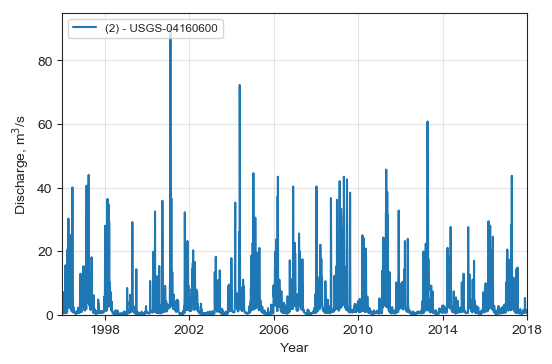

In [13]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['(2) - USGS-'+site], loc=2, fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('Rivers/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Q.pdf')





In [14]:
discharge[['Date', 'Flow, CFS']].to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### EGRET Results

In [15]:
river

'Belle_R'

In [16]:

EGRET_Daily = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Daily.csv')
EGRET_Sample = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Sample.csv')


In [17]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


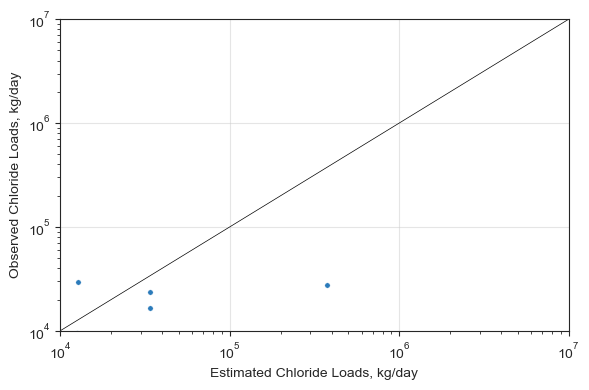

In [18]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,100000000],[-100,100000000], 'k', lw=0.5)
plt.xlim(10000,10000000)
plt.ylim(10000,10000000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Chloride Loads, kg/day")
plt.ylabel("Observed Chloride Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_FvsF.pdf')


In [19]:
EGRET_Daily = EGRET_Daily.drop([4290])

In [20]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


In [21]:
EGRET_Daily_an

,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FluxYearMTA,Fx_SE
0,1996,137.5,3.445974,53461.5,5.007299,137.500000,1996.374431,1757.007299,137.5,0.516177,3.498398,3.733586,9.005889,0.413593,8.389539e+16,3.671623e+19,1.281736e+17,1.340142e+19,1.331258e+17
1,1997,457.0,4.113080,53781.0,6.526027,183.838356,1997.248146,1767.501370,457.0,0.796289,4.120018,4.095244,7.789378,0.443264,9.131449e+15,4.154241e+18,2.247904e+06,1.516298e+18,2.417775e+16
2,1998,822.0,2.583008,54146.0,6.526027,183.838356,1998.248059,1779.501370,822.0,0.096546,2.587823,2.633034,7.812533,0.455768,5.953369e+14,2.561314e+17,3.614869e+10,9.348798e+16,5.092976e+14
3,1999,1187.0,1.103985,54511.0,6.526027,183.838356,1999.248059,1791.501370,1187.0,-0.516100,1.102750,1.103182,9.349417,0.477085,4.884660e+12,2.176309e+15,5.910976e+13,7.943530e+14,5.102639e+08
4,2000,1552.5,2.128514,54876.5,6.513661,183.500000,2000.248661,1803.497268,1552.5,0.015854,2.083386,1.853180,9.481436,0.436027,7.783288e+10,1.249313e+13,4.157418e+12,4.559993e+12,7.073004e+09
5,2001,1918.0,3.062626,55242.0,6.526027,183.838356,2001.248146,1815.501370,1918.0,0.474690,3.105118,3.324344,7.904874,0.413107,2.823886e+11,1.122987e+14,5.794541e+11,4.098902e+13,2.914052e+12
6,2002,2283.0,2.949819,55607.0,6.526027,183.838356,2002.248059,1827.501370,2283.0,0.519271,2.953011,2.961643,7.648214,0.406637,8.214490e+08,3.060002e+11,2.536191e+08,1.116901e+11,5.170131e+08
7,2003,2648.0,1.433856,55972.0,6.526027,183.838356,2003.248059,1839.501370,2648.0,-0.363418,1.432140,1.428779,10.374426,0.447724,1.478901e+12,3.600758e+13,1.193267e+08,1.314277e+13,2.011179e+10
8,2004,3013.5,3.737613,56337.5,6.513661,183.500000,2004.248661,1851.497268,3013.5,0.610728,3.738672,3.737980,8.210763,0.408184,2.375606e+06,8.097416e+08,7.373939e+03,2.955557e+08,7.424409e+06
9,2005,3379.0,3.209570,56703.0,6.526027,183.838356,2005.248146,1863.501370,3379.0,0.430760,3.206796,3.203360,7.064566,0.431773,9.303982e+05,3.557740e+08,2.680814e+03,1.298575e+08,2.345589e+07


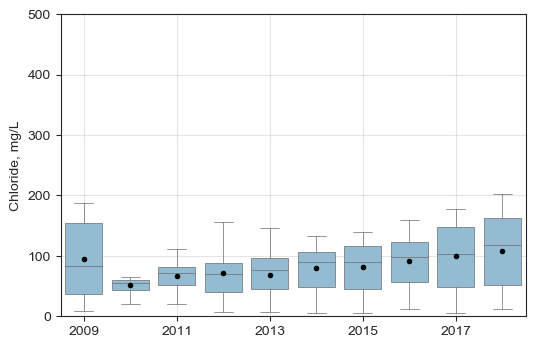

In [22]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2009,2019))

# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
# plt.xlim(-0.5, 14.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,500)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl.pdf')




In [23]:
EGRET_Daily.groupby('waterYear').mean()

,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FluxYearMTA,Fx_SE
waterYear,,,,,,,,,,,,,,,,,,
1996,137.5,3.445974,53461.5,5.007299,137.500000,1996.374431,1757.007299,137.5,0.516177,3.498398,3.733586,9.005889,0.413593,8.389539e+16,3.671623e+19,1.281736e+17,1.340142e+19,1.331258e+17
1997,457.0,4.113080,53781.0,6.526027,183.838356,1997.248146,1767.501370,457.0,0.796289,4.120018,4.095244,7.789378,0.443264,9.131449e+15,4.154241e+18,2.247904e+06,1.516298e+18,2.417775e+16
1998,822.0,2.583008,54146.0,6.526027,183.838356,1998.248059,1779.501370,822.0,0.096546,2.587823,2.633034,7.812533,0.455768,5.953369e+14,2.561314e+17,3.614869e+10,9.348798e+16,5.092976e+14
1999,1187.0,1.103985,54511.0,6.526027,183.838356,1999.248059,1791.501370,1187.0,-0.516100,1.102750,1.103182,9.349417,0.477085,4.884660e+12,2.176309e+15,5.910976e+13,7.943530e+14,5.102639e+08
2000,1552.5,2.128514,54876.5,6.513661,183.500000,2000.248661,1803.497268,1552.5,0.015854,2.083386,1.853180,9.481436,0.436027,7.783288e+10,1.249313e+13,4.157418e+12,4.559993e+12,7.073004e+09
2001,1918.0,3.062626,55242.0,6.526027,183.838356,2001.248146,1815.501370,1918.0,0.474690,3.105118,3.324344,7.904874,0.413107,2.823886e+11,1.122987e+14,5.794541e+11,4.098902e+13,2.914052e+12
2002,2283.0,2.949819,55607.0,6.526027,183.838356,2002.248059,1827.501370,2283.0,0.519271,2.953011,2.961643,7.648214,0.406637,8.214490e+08,3.060002e+11,2.536191e+08,1.116901e+11,5.170131e+08
2003,2648.0,1.433856,55972.0,6.526027,183.838356,2003.248059,1839.501370,2648.0,-0.363418,1.432140,1.428779,10.374426,0.447724,1.478901e+12,3.600758e+13,1.193267e+08,1.314277e+13,2.011179e+10
2004,3013.5,3.737613,56337.5,6.513661,183.500000,2004.248661,1851.497268,3013.5,0.610728,3.738672,3.737980,8.210763,0.408184,2.375606e+06,8.097416e+08,7.373939e+03,2.955557e+08,7.424409e+06


In [24]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




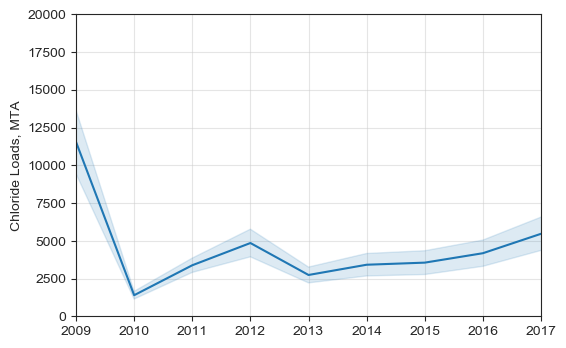

In [28]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an['waterYear'][:k], EGRET_Daily_an['FluxYearMTA'][:k], c=sns.color_palette()[0])

# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]-EGRET_Daily_an['Fx_SE'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]+EGRET_Daily_an['Fx_SE'][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)



# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.xlim(2009,2017)
plt.ylim(0,20000)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl_Flux.pdf')


In [29]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2018) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
           7  &           8  &           9  &         10 &            11 &       12 &       13 &      14 &      15 &      16 &      17 &      18 &      19 &      20 &      21 \\
\midrule
 2.003000e+03 &       2004.0 &       2005.0 &     2006.0 &  2.007000e+03 &   2008.0 &   2009.0 &  2010.0 &  2011.0 &  2012.0 &  2013.0 &  2014.0 &  2015.0 &  2016.0 &  2017.0 \\
 1.314277e+13 &  295555671.4 &  129857505.9 &  1950264.1 &  2.801819e+11 &  34301.7 &  11545.4 &  1395.1 &  3378.4 &  4851.4 &  2735.6 &  3413.5 &  3552.4 &  4176.6 &  5463.2 \\
 2.011179e+10 &    7424409.1 &   23455891.8 &   256020.8 &  3.051892e+09 &   5323.4 &   2105.5 &   256.2 &   473.5 &   916.1 &   523.5 &   744.1 &   787.0 &   869.0 &  1103.6 \\
\bottomrule
\end{tabular}



In [30]:
EGRET_Daily.groupby(['waterYear'])['FluxYearMTA'].describe()

,count,mean,std,min,25%,50%,75%,max
waterYear,,,,,,,,
1996,200.0,1.340142e+19,5.836612e+19,214.712172,582.056699,177660.098850,1.529738e+08,4.048434e+20
1997,232.0,1.516298e+18,5.071018e+18,85.119712,898.223047,8438.964224,2.274238e+07,3.041948e+19
1998,293.0,9.348798e+16,4.404360e+17,351.855092,3116.534920,35730.163328,5.698757e+05,3.306314e+18
1999,341.0,7.943530e+14,8.119779e+15,428.294920,31087.388130,836745.176213,6.444582e+06,1.135039e+17
2000,327.0,4.559993e+12,5.060922e+13,574.830046,27864.529114,669388.384228,7.172385e+06,7.989617e+14
2001,258.0,4.098902e+13,2.262604e+14,513.179561,2538.286166,80169.422964,1.520295e+07,2.244806e+15
2002,244.0,1.116901e+11,7.961184e+11,524.090289,4189.701160,57922.855756,1.998173e+07,9.957734e+12
2003,355.0,1.314277e+13,4.439511e+13,556.366925,14216.666106,930869.876562,5.905208e+07,2.432887e+14
2004,251.0,2.955557e+08,3.547341e+09,771.711128,8900.003312,159296.139368,1.619324e+07,5.587226e+10
